<a href="https://colab.research.google.com/github/ArghyaPal/AI_Course_Tutorial/blob/master/Lesson_4_Kernel_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SVM using Inbuilt Kernels**

Here we will be experimenting with different inbuilt Kernels. If time permits, we will also learn to create custom kernels.

In [0]:
#Suppressing all warnings
import warnings
warnings.filterwarnings("ignore")

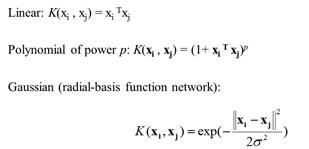

In [0]:
#@title Linear, Polynomial & RBF-
Image("kernel2.jpg", width=600)


[The Digit Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)

This dataset is made up of 1797 8x8 images of hand-written digits so we have 10 classes. We have to first transform it into a feature vector with length 64.

*You are encouraged to try EDA on this as an exercise to get a better hang of the data.*

In [0]:
from sklearn import datasets
# Loading the Digits dataset
digits = datasets.load_digits()

In [0]:
digits

In [0]:
digits.data.shape, digits.images.shape ,np.unique(digits.data==digits.images.reshape(1797,64))

((1797, 64), (1797, 8, 8), array([ True]))

In [0]:
# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)#1797
X = digits.images.reshape((n_samples, -1))
y = digits.target
#print(X.shape)#(1797,64)

# Split the dataset in two equal parts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

### SVM with default Hyperparameter
By default:
C=1.0

gamma='auto'

kernel='rbf'


In [0]:
from sklearn.svm import SVC
from sklearn import metrics

In [0]:
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Score:
0.2335928809788654


### SVM with Linear Kernel

In [0]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.967741935483871


**Note**: If linear works, go with it.

###SVM with RBF Kernel

In [0]:
svc=SVC(kernel='rbf', gamma='scale')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9877641824249166


**Note**:

If gamma is overestimated, the exponential will behave almost linearly and the higher-dimensional projection will start to lose its non-linear power. On the other hand, if it's underestimated, the function will lack regularization and the decision boundary will be highly sensitive to noise in training data.
Default value of gamma is ‘auto’ which uses 1 / n_features, if gamma='scale' is passed then it uses 1 / (n_features * X.var()) as value of gamma.

###SVM with Polynomial Kernel

In [0]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9833147942157954


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


**Note**: 

Polynomial kernels are well suited for problems where all the training data is normalized.

Although the RBF kernel is more popular in SVM classification than the polynomial kernel, the latter is quite popular in natural language processing.

# **Model Evaluation & Comparison**

Now we compare with the scores of some other classifiers fit on this data.

In [0]:
#SVM
clf=SVC(kernel='poly')
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print('SVM Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

#Naive Bayes
from sklearn.naive_bayes import BernoulliNB

clf=BernoulliNB()
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print('NB Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

#Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)

y_pred=clf.predict(X_test)
print('LR Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

#Decision Tree
from sklearn import tree

clf = tree.DecisionTreeClassifier().fit(X_train, y_train)

y_pred=clf.predict(X_test)
print('DT Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


SVM Accuracy Score:
0.9833147942157954
NB Accuracy Score:
0.8431590656284761
LR Accuracy Score:
0.9443826473859844
DT Accuracy Score:
0.8298109010011123


###Hyper-parameter Tuning

As you might have realized by now, your model's performance depends a lot on your Hyperparameter.

To make our life a little easier, we have **GridSearchCV** and **RandomizedSearchCV**!


####**GridSearch** 
Takes a dictionary of all of the different hyperparameters that you want to test, and then feeds all of the different combinations through the algorithm for you and then reports back to you which one had the highest accuracy.

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the parameters by cross-validation
tuned_parameters = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000],
                     'kernel': ['linear'], 'C': [1, 10, 100, 1000]}

score='accuracy'
print("# Tuning hyper-parameters for "+str(score))

clf = GridSearchCV(SVC(), tuned_parameters, cv=5,scoring=score)

clf.fit(X_train, y_train)

print("Best parameters set found on development set:")

print(clf.best_params_)

print("Grid scores on development set:")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

print("Detailed classification report:")

print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

# Tuning hyper-parameters for accuracy
Best parameters set found on development set:
{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Grid scores on development set:
0.973 (+/-0.015) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.973 (+/-0.015) for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.973 (+/-0.015) for {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.973 (+/-0.015) for {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
0.973 (+/-0.015) for {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
0.973 (+/-0.015) for {'C': 100, 'gamma': 0.0001, 'kernel': 'linear'}
0.973 (+/-0.015) for {'C': 1000, 'gamma': 0.001, 'kernel': 'linear'}
0.973 (+/-0.015) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'linear'}
Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.96      0.96      0.96        

####**RandomSearch** 
Performed by evaluating n uniformly random points in the hyperparameter space, and selects the one producing the best performance. 


*Try RandomizedSearchCV as as exercise.*

*Also, try using different scores as an exercise.*

# **SVM using Custom Kernels**

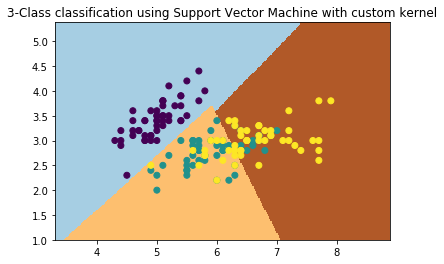

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target


def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)


h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=my_kernel)
clf.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.title('3-Class classification using Support Vector Machine with custom'
          ' kernel')

plt.show()

*Try using your own custom kernel as an exercise.*

Reference https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html